In [1]:
import numpy as np
import pandas as pd

### 1. pandas 자료구조
pandas는 series와 dataframe을 사용한다.
#### 1-1. series

In [3]:
# define Series
obj = pd.Series([4,7,-5,3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [4]:
# check values. it doesn't need paranthesis
obj.values

array([ 4,  7, -5,  3])

In [7]:
# check index
obj.index

dtype('int64')

In [100]:
# check types
obj.dtypes

dtype('int64')

In [101]:
# change index
obj2 = pd.Series([4,7,-5,3], index = ['a','b','c','d'])
obj2

a    4
b    7
c   -5
d    3
dtype: int64

In [12]:
# create Series with python dictionary
sdata = {'a':100, 'b':200, 'c': 1, 'd':100}
obj3 = pd.Series(sdata)
obj3

a    100
b    200
c      1
d    100
dtype: int64

In [13]:
# name the series
obj3.name = 'salary'
obj3.index.name = 'Names'
obj3

Names
a    100
b    200
c      1
d    100
Name: salary, dtype: int64

In [17]:
# change index 
obj3.index = ['A', 'B', 'C', 'D']
obj3.index.name = 'Names'
obj3

Names
A    100
B    200
C      1
D    100
Name: salary, dtype: int64

#### 1-2 Data Frame 
Data Frame can be defined with 'dictionary' or 'array from numpy'

In [32]:
# define df with dictionary
data = {'name': ['Daeun', 'Junyoung', 'Dajun'],
       'year': ['1992', '1993', '2030'],
       'points': [123, 100, 111]}
df = pd.DataFrame(data)
df

,name,year,points
0,Daeun,1992,123
1,Junyoung,1993,100
2,Dajun,2030,111


In [33]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [34]:
df.columns

Index(['name', 'year', 'points'], dtype='object')

In [35]:
df.values

array([['Daeun', '1992', 123],
       ['Junyoung', '1993', 100],
       ['Dajun', '2030', 111]], dtype=object)

In [37]:
df.index.name = 'Num'
df.columns.name = 'Info'
df

Info,name,year,points
Num,,,
0,Daeun,1992,123
1,Junyoung,1993,100
2,Dajun,2030,111


In [40]:
# we can set up col and index name as we create pandas dataframe
df2 = pd.DataFrame(data, columns = ['year', 'name', 'points','penalty'],
                  index = ['one', 'two', 'three'])
df2

,year,name,points,penalty
one,1992,Daeun,123,NaN
two,1993,Junyoung,100,NaN
three,2030,Dajun,111,NaN


if new column is added, NaN takes over the new place.
even though we put columns in different order , it finds the right column from the dictionary

### 3. DataFrame Indexing

In [58]:
# define new DF
data = {"names": ["Kilho", "Kilho", "Kilho", "Charles", "Charles"],
           "year": [2014, 2015, 2016, 2015, 2016],
           "points": [1.5, 1.7, 3.6, 2.4, 2.9]}
df = pd.DataFrame(data, columns = ['year', 'names', 'points', 'penalty'],
                 index = ['one', 'two', 'three', 'four', 'five'])
df

,year,names,points,penalty
one,2014,Kilho,1.5,NaN
two,2015,Kilho,1.7,NaN
three,2016,Kilho,3.6,NaN
four,2015,Charles,2.4,NaN
five,2016,Charles,2.9,NaN


#### 3-1 handling a Column

In [59]:
df.year

one      2014
two      2015
three    2016
four     2015
five     2016
Name: year, dtype: int64

In [60]:
df['year']

one      2014
two      2015
three    2016
four     2015
five     2016
Name: year, dtype: int64

In [61]:
df[['year', 'names']]

,year,names
one,2014,Kilho
two,2015,Kilho
three,2016,Kilho
four,2015,Charles
five,2016,Charles


In [62]:
#df.penalty = 0.5
df['penalty'] = 0.5
df

,year,names,points,penalty
one,2014,Kilho,1.5,0.5
two,2015,Kilho,1.7,0.5
three,2016,Kilho,3.6,0.5
four,2015,Charles,2.4,0.5
five,2016,Charles,2.9,0.5


In [64]:
df.penalty = [0.1, 0.2, 0.3, 0.4, 0.5] #penalty already exists
#df.zeros = np.arange(5) #try to add new column
df

,year,names,points,penalty
one,2014,Kilho,1.5,0.1
two,2015,Kilho,1.7,0.2
three,2016,Kilho,3.6,0.3
four,2015,Charles,2.4,0.4
five,2016,Charles,2.9,0.5


'.'을 이용해 열을 고칠 수 있다. 그러나 '.'을 이용해 새롭게 열을 추가하는 것은 안됨.

새롭게 열을 추가하려면 df.['new column'] 을 활용해야함

In [65]:
df['zeros'] = np.arange(5)
df

,year,names,points,penalty,zeros
one,2014,Kilho,1.5,0.1,0
two,2015,Kilho,1.7,0.2,1
three,2016,Kilho,3.6,0.3,2
four,2015,Charles,2.4,0.4,3
five,2016,Charles,2.9,0.5,4


In [68]:
# we can add column with Series and choose index we want
tmp = pd.Series([-2, -4, -1], index = ['two', 'four', 'five'])
df['debt'] = tmp
df

,year,names,points,penalty,zeros,debt
one,2014,Kilho,1.5,0.1,0,NaN
two,2015,Kilho,1.7,0.2,1,-2.0
three,2016,Kilho,3.6,0.3,2,NaN
four,2015,Charles,2.4,0.4,3,-4.0
five,2016,Charles,2.9,0.5,4,-1.0


add new column with chosing certain index

In [96]:
# logical operation of two columns! 
df['net_points'] = df.points - df.penalty
df['high_points'] = df['net_points'] > 2.0
df

,year,names,points,penalty,zeros,debt,net_points,high_points
one,2014,Kilho,1.5,0.1,0,NaN,1.4,False
two,2015,Kilho,1.7,0.2,1,-2.0,1.5,False
three,2016,Kilho,3.6,0.3,2,NaN,3.3,True
four,2015,Charles,2.4,0.4,3,-4.0,2.0,False
five,2016,Charles,2.9,0.5,4,-1.0,2.4,True


In [112]:
# delete a column

# df.drop('high_points', axis = 1, inplace = True)
del df['high_points']
del df['zeros']
df.index.name = 'Order'
df

KeyError: 'high_points'

#### 2-2 handling index(row)

In [232]:
df[0:3]

,A,B,C,D,F
2016-07-01,-0.410252,-0.922548,0.819142,-0.061979,1.0
2016-07-02,0.026257,-0.647420,2.118147,-0.094440,NaN
2016-07-03,0.157232,0.969809,-1.128604,0.174212,3.5


In [113]:
df['two':'four']

,year,names,points,penalty,debt,net_points
Order,,,,,,
two,2015,Kilho,1.7,0.2,-2.0,1.5
three,2016,Kilho,3.6,0.3,NaN,3.3
four,2015,Charles,2.4,0.4,-4.0,2.0


In [115]:
# Best way to index row
# use .loc and .iloc 
df.loc['two']

year           2015
names         Kilho
points          1.7
penalty         0.2
debt             -2
net_points      1.5
Name: two, dtype: object

In [116]:
df.loc['two':'four']

,year,names,points,penalty,debt,net_points
Order,,,,,,
two,2015,Kilho,1.7,0.2,-2.0,1.5
three,2016,Kilho,3.6,0.3,NaN,3.3
four,2015,Charles,2.4,0.4,-4.0,2.0


In [121]:
df.loc['two':'four', 'points']

Order
two      1.7
three    3.6
four     2.4
Name: points, dtype: float64

In [124]:
df.loc[:, 'year'] # : means all rows  >> df['year']

Order
one      2014
two      2015
three    2016
four     2015
five     2016
Name: year, dtype: int64

In [125]:
df.loc['three':'five', 'year':'penalty']

,year,names,points,penalty
Order,,,,
three,2016,Kilho,3.6,0.3
four,2015,Charles,2.4,0.4
five,2016,Charles,2.9,0.5


In [128]:
df.loc['six', :] = [2013,'Jun', 4.0, 0.1, 2.1, 3.9]

In [130]:
del df['net_points']

In [133]:
# .iloc :: use index number
df.iloc[2]

year        2016
names      Kilho
points       3.6
penalty      0.3
debt         NaN
Name: three, dtype: object

In [134]:
df

,year,names,points,penalty,debt
Order,,,,,
one,2014.0,Kilho,1.5,0.1,NaN
two,2015.0,Kilho,1.7,0.2,-2.0
three,2016.0,Kilho,3.6,0.3,NaN
four,2015.0,Charles,2.4,0.4,-4.0
five,2016.0,Charles,2.9,0.5,-1.0
six,2013.0,Jun,4.0,0.1,2.1


In [148]:
df.iloc[3:5, 0:2]

,year,names
Order,,
four,2015.0,Charles
five,2016.0,Charles


In [150]:
df.iloc[[0,1,3], [1,2]]

,names,points
Order,,
one,Kilho,1.5
two,Kilho,1.7
four,Charles,2.4


In [151]:
df.iloc[:, 1:4]

,names,points,penalty
Order,,,
one,Kilho,1.5,0.1
two,Kilho,1.7,0.2
three,Kilho,3.6,0.3
four,Charles,2.4,0.4
five,Charles,2.9,0.5
six,Jun,4.0,0.1


In [158]:
df.iloc[1,1]

'Kilho'

#### 3. Boolean Indexing

In [159]:
df

,year,names,points,penalty,debt
Order,,,,,
one,2014.0,Kilho,1.5,0.1,NaN
two,2015.0,Kilho,1.7,0.2,-2.0
three,2016.0,Kilho,3.6,0.3,NaN
four,2015.0,Charles,2.4,0.4,-4.0
five,2016.0,Charles,2.9,0.5,-1.0
six,2013.0,Jun,4.0,0.1,2.1


In [162]:
# rows with year higher than 2013
df.loc[df['year'] > 2014,]

,year,names,points,penalty,debt
Order,,,,,
two,2015.0,Kilho,1.7,0.2,-2.0
three,2016.0,Kilho,3.6,0.3,NaN
four,2015.0,Charles,2.4,0.4,-4.0
five,2016.0,Charles,2.9,0.5,-1.0


In [171]:
df.loc[df['names'] == 'Kilho', ['year', 'names', 'penalty']]

,year,names,penalty
Order,,,
one,2014.0,Kilho,0.1
two,2015.0,Kilho,0.2
three,2016.0,Kilho,0.3


Order
one      False
two      False
three    False
four      True
five      True
six      False
Name: points, dtype: bool

In [177]:
# use logical operation. makes sure put '()'
df.loc[(df['points']>2) & (df['points'] <3), :]

,year,names,points,penalty,debt
Order,,,,,
four,2015.0,Charles,2.4,0.4,-4.0
five,2016.0,Charles,2.9,0.5,-1.0


In [179]:
df.loc[df['points'] > 3, 'penalty'] = 0
df

,year,names,points,penalty,debt
Order,,,,,
one,2014.0,Kilho,1.5,0.1,NaN
two,2015.0,Kilho,1.7,0.2,-2.0
three,2016.0,Kilho,3.6,0.0,NaN
four,2015.0,Charles,2.4,0.4,-4.0
five,2016.0,Charles,2.9,0.5,-1.0
six,2013.0,Jun,4.0,0.0,2.1


#### 4. Data

In [180]:
df = pd.DataFrame(np.random.randn(6,4))

In [181]:
df

,0,1,2,3
0,-0.410252,-0.922548,0.819142,-0.061979
1,0.026257,-0.647420,2.118147,-0.094440
2,0.157232,0.969809,-1.128604,0.174212
3,-0.702216,-2.300490,-0.316719,-0.707019
4,-0.859452,-0.082281,0.324647,-0.403582
5,-1.244684,-0.381494,-0.656770,-1.666052


In [185]:
df.columns = ['A', 'B', 'C', 'D']
df.index = pd.date_range('20160701', periods = 6)
df

,A,B,C,D
2016-07-01,-0.410252,-0.922548,0.819142,-0.061979
2016-07-02,0.026257,-0.647420,2.118147,-0.094440
2016-07-03,0.157232,0.969809,-1.128604,0.174212
2016-07-04,-0.702216,-2.300490,-0.316719,-0.707019
2016-07-05,-0.859452,-0.082281,0.324647,-0.403582
2016-07-06,-1.244684,-0.381494,-0.656770,-1.666052


In [187]:
df['F'] = [1.0, np.nan, 3.5, 6.1, np.nan, 7.0]
df

,A,B,C,D,F
2016-07-01,-0.410252,-0.922548,0.819142,-0.061979,1.0
2016-07-02,0.026257,-0.647420,2.118147,-0.094440,NaN
2016-07-03,0.157232,0.969809,-1.128604,0.174212,3.5
2016-07-04,-0.702216,-2.300490,-0.316719,-0.707019,6.1
2016-07-05,-0.859452,-0.082281,0.324647,-0.403582,NaN
2016-07-06,-1.244684,-0.381494,-0.656770,-1.666052,7.0


#### delet NaN
.dropna(how = '')  #any, all

it returns result. so if you want to change put 'inplace = True'

In [192]:
df.dropna(how = 'any') # 행의 값중 하나라도 na면 그 행 모두 삭제

,A,B,C,D,F
2016-07-01,-0.410252,-0.922548,0.819142,-0.061979,1.0
2016-07-03,0.157232,0.969809,-1.128604,0.174212,3.5
2016-07-04,-0.702216,-2.300490,-0.316719,-0.707019,6.1
2016-07-06,-1.244684,-0.381494,-0.656770,-1.666052,7.0


In [193]:
df.dropna(how = 'all') #모든 행이 NA이면 그 행 삭제

,A,B,C,D,F
2016-07-01,-0.410252,-0.922548,0.819142,-0.061979,1.0
2016-07-02,0.026257,-0.647420,2.118147,-0.094440,NaN
2016-07-03,0.157232,0.969809,-1.128604,0.174212,3.5
2016-07-04,-0.702216,-2.300490,-0.316719,-0.707019,6.1
2016-07-05,-0.859452,-0.082281,0.324647,-0.403582,NaN
2016-07-06,-1.244684,-0.381494,-0.656770,-1.666052,7.0


In [203]:
# na 값에 값 넣기
df.fillna(value = 0.5)

,A,B,C,D,F
2016-07-01,-0.410252,-0.922548,0.819142,-0.061979,1.0
2016-07-02,0.026257,-0.647420,2.118147,-0.094440,0.5
2016-07-03,0.157232,0.969809,-1.128604,0.174212,3.5
2016-07-04,-0.702216,-2.300490,-0.316719,-0.707019,6.1
2016-07-05,-0.859452,-0.082281,0.324647,-0.403582,0.5
2016-07-06,-1.244684,-0.381494,-0.656770,-1.666052,7.0


In [212]:
# check if there is NA
df.isnull().sum(axis = 0)

A    0
B    0
C    0
D    0
F    2
dtype: int64

In [213]:
df

,A,B,C,D,F
2016-07-01,-0.410252,-0.922548,0.819142,-0.061979,1.0
2016-07-02,0.026257,-0.647420,2.118147,-0.094440,NaN
2016-07-03,0.157232,0.969809,-1.128604,0.174212,3.5
2016-07-04,-0.702216,-2.300490,-0.316719,-0.707019,6.1
2016-07-05,-0.859452,-0.082281,0.324647,-0.403582,NaN
2016-07-06,-1.244684,-0.381494,-0.656770,-1.666052,7.0


In [235]:
df.isnull()

,A,B,C,D,F
2016-07-01,False,False,False,False,False
2016-07-02,False,False,False,False,True
2016-07-03,False,False,False,False,False
2016-07-04,False,False,False,False,False
2016-07-05,False,False,False,False,True
2016-07-06,False,False,False,False,False


In [231]:
df.isnull()['F']

2016-07-01    False
2016-07-02     True
2016-07-03    False
2016-07-04    False
2016-07-05     True
2016-07-06    False
Freq: D, Name: F, dtype: bool

In [237]:
df.loc[df.isnull()['F'], :]

,A,B,C,D,F
2016-07-02,0.026257,-0.647420,2.118147,-0.094440,NaN
2016-07-05,-0.859452,-0.082281,0.324647,-0.403582,NaN


In [239]:
df.drop(pd.to_datetime('20160701'))

,A,B,C,D,F
2016-07-02,0.026257,-0.647420,2.118147,-0.094440,NaN
2016-07-03,0.157232,0.969809,-1.128604,0.174212,3.5
2016-07-04,-0.702216,-2.300490,-0.316719,-0.707019,6.1
2016-07-05,-0.859452,-0.082281,0.324647,-0.403582,NaN
2016-07-06,-1.244684,-0.381494,-0.656770,-1.666052,7.0


In [240]:
df.drop([pd.to_datetime('20160701'), pd.to_datetime('20160704')])

,A,B,C,D,F
2016-07-02,0.026257,-0.647420,2.118147,-0.094440,NaN
2016-07-03,0.157232,0.969809,-1.128604,0.174212,3.5
2016-07-05,-0.859452,-0.082281,0.324647,-0.403582,NaN
2016-07-06,-1.244684,-0.381494,-0.656770,-1.666052,7.0


In [242]:
df.drop('F', axis = 1)

,A,B,C,D
2016-07-01,-0.410252,-0.922548,0.819142,-0.061979
2016-07-02,0.026257,-0.647420,2.118147,-0.094440
2016-07-03,0.157232,0.969809,-1.128604,0.174212
2016-07-04,-0.702216,-2.300490,-0.316719,-0.707019
2016-07-05,-0.859452,-0.082281,0.324647,-0.403582
2016-07-06,-1.244684,-0.381494,-0.656770,-1.666052


In [243]:
df.drop(['B','D'], axis = 1)

,A,C,F
2016-07-01,-0.410252,0.819142,1.0
2016-07-02,0.026257,2.118147,NaN
2016-07-03,0.157232,-1.128604,3.5
2016-07-04,-0.702216,-0.316719,6.1
2016-07-05,-0.859452,0.324647,NaN
2016-07-06,-1.244684,-0.656770,7.0


In [252]:
df.loc[pd.to_datetime('20160701'):pd.to_datetime('20160706'),['A','C', 'F']]

,A,C,F
2016-07-01,-0.410252,0.819142,1.0
2016-07-02,0.026257,2.118147,NaN
2016-07-03,0.157232,-1.128604,3.5
2016-07-04,-0.702216,-0.316719,6.1
2016-07-05,-0.859452,0.324647,NaN
2016-07-06,-1.244684,-0.656770,7.0


#### 5. Data analysis Function

In [256]:
data = [[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]]
data
df = pd.DataFrame(data, columns = ['one', 'two'], index = ['a','b','c','d'])

In [257]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [258]:
df.sum(axis=0)

one    9.25
two   -5.80
dtype: float64

In [259]:
df.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [260]:
df.sum(axis = 1, skipna = False)

a     NaN
b    2.60
c     NaN
d   -0.55
dtype: float64

sum() 동작시 skipna = True 가 기본 설정. 즉, NA 값 무시되고 연산이 됨.

In [261]:
#특정 행 또는 열에서만 계산
df['one'].sum()

9.25

In [275]:
df.loc[['a','b'],:].sum(axis = 1)

a    1.4
b    2.6
dtype: float64

In [277]:
df.loc['b'].sum()

2.5999999999999996

In [289]:
df.mean()

one    3.083333
two   -2.900000
dtype: float64

In [280]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [290]:
df.std()

one    3.493685
two    2.262742
dtype: float64

In [291]:
df.mad()

one    2.677778
two    1.600000
dtype: float64

In [294]:
df2 = pd.DataFrame(np.random.randn(6,4), columns = ['A', 'B', 'C','D'],
                  index = pd.date_range('20190423', periods = 6))
df2

,A,B,C,D
2019-04-23,-1.504085,1.120001,0.709687,-0.000629
2019-04-24,-0.554712,-0.218728,0.719082,-1.763308
2019-04-25,-0.318185,-0.293996,0.122217,0.202231
2019-04-26,-0.465828,1.403196,-0.524438,-0.323274
2019-04-27,-1.566100,0.000831,0.450436,0.043609
2019-04-28,1.945024,1.267887,0.669696,-0.234314


In [295]:
#correlation between column A and B
df2['A'].corr(df2['B'])

0.3327143838548264

In [297]:
df2['B'].cov(df2['C'])

-0.0916018638506182

#### Sorting function and etc 

In [300]:
random_date = np.random.permutation(df2.index)
random_date
df2.index

DatetimeIndex(['2019-04-23', '2019-04-24', '2019-04-25', '2019-04-26',
               '2019-04-27', '2019-04-28'],
              dtype='datetime64[ns]', freq='D')

In [303]:
df2 = df2.reindex(index = random_date, columns = ['D','B','C','A'])
df2

,D,B,C,A
2019-04-26,-0.323274,1.403196,-0.524438,-0.465828
2019-04-25,0.202231,-0.293996,0.122217,-0.318185
2019-04-28,-0.234314,1.267887,0.669696,1.945024
2019-04-24,-1.763308,-0.218728,0.719082,-0.554712
2019-04-27,0.043609,0.000831,0.450436,-1.566100
2019-04-23,-0.000629,1.120001,0.709687,-1.504085


In [304]:
# sort by index with ascending order
df2.sort_index(axis = 0) # row

,D,B,C,A
2019-04-23,-0.000629,1.120001,0.709687,-1.504085
2019-04-24,-1.763308,-0.218728,0.719082,-0.554712
2019-04-25,0.202231,-0.293996,0.122217,-0.318185
2019-04-26,-0.323274,1.403196,-0.524438,-0.465828
2019-04-27,0.043609,0.000831,0.450436,-1.566100
2019-04-28,-0.234314,1.267887,0.669696,1.945024


In [306]:
df2.sort_index(axis = 1) # column 

,A,B,C,D
2019-04-26,-0.465828,1.403196,-0.524438,-0.323274
2019-04-25,-0.318185,-0.293996,0.122217,0.202231
2019-04-28,1.945024,1.267887,0.669696,-0.234314
2019-04-24,-0.554712,-0.218728,0.719082,-1.763308
2019-04-27,-1.566100,0.000831,0.450436,0.043609
2019-04-23,-1.504085,1.120001,0.709687,-0.000629


In [308]:
df2.sort_index(axis = 0, ascending=False)

,D,B,C,A
2019-04-28,-0.234314,1.267887,0.669696,1.945024
2019-04-27,0.043609,0.000831,0.450436,-1.566100
2019-04-26,-0.323274,1.403196,-0.524438,-0.465828
2019-04-25,0.202231,-0.293996,0.122217,-0.318185
2019-04-24,-1.763308,-0.218728,0.719082,-0.554712
2019-04-23,-0.000629,1.120001,0.709687,-1.504085


In [309]:
# sort by values in dataframe
# D

df2.sort_values('D')

,D,B,C,A
2019-04-24,-1.763308,-0.218728,0.719082,-0.554712
2019-04-26,-0.323274,1.403196,-0.524438,-0.465828
2019-04-28,-0.234314,1.267887,0.669696,1.945024
2019-04-23,-0.000629,1.120001,0.709687,-1.504085
2019-04-27,0.043609,0.000831,0.450436,-1.566100
2019-04-25,0.202231,-0.293996,0.122217,-0.318185


In [310]:
df2.sort_values(['D', 'B'])

,D,B,C,A
2019-04-24,-1.763308,-0.218728,0.719082,-0.554712
2019-04-26,-0.323274,1.403196,-0.524438,-0.465828
2019-04-28,-0.234314,1.267887,0.669696,1.945024
2019-04-23,-0.000629,1.120001,0.709687,-1.504085
2019-04-27,0.043609,0.000831,0.450436,-1.566100
2019-04-25,0.202231,-0.293996,0.122217,-0.318185


In [312]:
a = pd.DataFrame(data = [[1,1,1,2],[1,1,1,2],[2,2,2,2],[2,3,2,2]])

In [321]:
a.sort_values([0,1], ascending=False)

,0,1,2,3
3,2,3,2,2
2,2,2,2,2
0,1,1,1,2
1,1,1,1,2


In [322]:
df2

,D,B,C,A
2019-04-26,-0.323274,1.403196,-0.524438,-0.465828
2019-04-25,0.202231,-0.293996,0.122217,-0.318185
2019-04-28,-0.234314,1.267887,0.669696,1.945024
2019-04-24,-1.763308,-0.218728,0.719082,-0.554712
2019-04-27,0.043609,0.000831,0.450436,-1.566100
2019-04-23,-0.000629,1.120001,0.709687,-1.504085


In [323]:
df2['E'] = np.random.randint(0, 6, size = 6)

In [324]:
df2

,D,B,C,A,E
2019-04-26,-0.323274,1.403196,-0.524438,-0.465828,0
2019-04-25,0.202231,-0.293996,0.122217,-0.318185,2
2019-04-28,-0.234314,1.267887,0.669696,1.945024,1
2019-04-24,-1.763308,-0.218728,0.719082,-0.554712,4
2019-04-27,0.043609,0.000831,0.450436,-1.566100,2
2019-04-23,-0.000629,1.120001,0.709687,-1.504085,1


In [326]:
df2['F'] = ['alpha', 'beta', 'gamma', 'gamma', 'alpha', 'gamma']

In [327]:
df2

,D,B,C,A,E,F
2019-04-26,-0.323274,1.403196,-0.524438,-0.465828,0,alpha
2019-04-25,0.202231,-0.293996,0.122217,-0.318185,2,beta
2019-04-28,-0.234314,1.267887,0.669696,1.945024,1,gamma
2019-04-24,-1.763308,-0.218728,0.719082,-0.554712,4,gamma
2019-04-27,0.043609,0.000831,0.450436,-1.566100,2,alpha
2019-04-23,-0.000629,1.120001,0.709687,-1.504085,1,gamma


In [329]:
df2.sort_values('E')

,D,B,C,A,E,F
2019-04-26,-0.323274,1.403196,-0.524438,-0.465828,0,alpha
2019-04-28,-0.234314,1.267887,0.669696,1.945024,1,gamma
2019-04-23,-0.000629,1.120001,0.709687,-1.504085,1,gamma
2019-04-25,0.202231,-0.293996,0.122217,-0.318185,2,beta
2019-04-27,0.043609,0.000831,0.450436,-1.566100,2,alpha
2019-04-24,-1.763308,-0.218728,0.719082,-0.554712,4,gamma


In [330]:
df2.sort_values(['E', 'F'])

,D,B,C,A,E,F
2019-04-26,-0.323274,1.403196,-0.524438,-0.465828,0,alpha
2019-04-28,-0.234314,1.267887,0.669696,1.945024,1,gamma
2019-04-23,-0.000629,1.120001,0.709687,-1.504085,1,gamma
2019-04-27,0.043609,0.000831,0.450436,-1.566100,2,alpha
2019-04-25,0.202231,-0.293996,0.122217,-0.318185,2,beta
2019-04-24,-1.763308,-0.218728,0.719082,-0.554712,4,gamma


In [343]:
df2['F'].unique()

array(['alpha', 'beta', 'gamma'], dtype=object)

In [344]:
df2['F'].value_counts()

gamma    3
alpha    2
beta     1
Name: F, dtype: int64

In [345]:
df2['F'].isin(['alpha','beta'])

2019-04-26     True
2019-04-25     True
2019-04-28    False
2019-04-24    False
2019-04-27     True
2019-04-23    False
Name: F, dtype: bool

#### df.isin() 

In [347]:
df2.loc[df2['F'].isin(['alpha','beta']),:]

,D,B,C,A,E,F
2019-04-26,-0.323274,1.403196,-0.524438,-0.465828,0,alpha
2019-04-25,0.202231,-0.293996,0.122217,-0.318185,2,beta
2019-04-27,0.043609,0.000831,0.450436,-1.566100,2,alpha


In [348]:
df2.loc[(df2['F'].isin(['alpha','beta'])) & (df2['D'] > 0), :]

,D,B,C,A,E,F
2019-04-25,0.202231,-0.293996,0.122217,-0.318185,2,beta
2019-04-27,0.043609,0.000831,0.450436,-1.566100,2,alpha


In [376]:
df2.loc[df2['F'].isin(['alpha']),]

,D,B,C,A,E,F
2019-04-26,-0.323274,1.403196,-0.524438,-0.465828,0,alpha
2019-04-27,0.043609,0.000831,0.450436,-1.566100,2,alpha


#### apply and lambda

In [351]:
df3 = pd.DataFrame(data = np.random.randn(4,3), columns = ['b','d','e'], index = ['Seoul', 'Incheon', 'Busan','Daegu'])

In [352]:
df3

,b,d,e
Seoul,1.651683,0.793735,1.102689
Incheon,0.825188,-0.995192,-0.304421
Busan,-0.713721,-1.045554,1.163776
Daegu,0.077327,0.590959,-0.866625


In [353]:
df3.apply(lambda x : x.max() - x.min(), axis = 0)

b    2.365403
d    1.839289
e    2.030401
dtype: float64

In [356]:
df3.apply(lambda x : x.mean())

b    0.460119
d   -0.164013
e    0.273855
dtype: float64

In [357]:
df3.loc['mean'] = df3.apply(lambda x: x.mean())

In [377]:
df3

,b,d,e
Seoul,1.651683,0.793735,1.102689
Incheon,0.825188,-0.995192,-0.304421
Busan,-0.713721,-1.045554,1.163776
Daegu,0.077327,0.590959,-0.866625
mean,0.460119,-0.164013,0.273855


In [378]:
df3.idxmax()

b    Seoul
d    Seoul
e    Busan
dtype: object

In [382]:
df3.idxmax(axis = 1)

Seoul      b
Incheon    b
Busan      e
Daegu      d
mean       b
dtype: object

In [431]:
df4 = pd.DataFrame([[1,2,3],[1,2,3],[4,2,3],[1,1,1],[4,3,3]], columns = ['a','b','c'])
df4

,a,b,c
0,1,2,3
1,1,2,3
2,4,2,3
3,1,1,1
4,4,3,3


In [432]:
df4.groupby('a').a.count()

a
1    3
4    2
Name: a, dtype: int64

In [433]:
df4.groupby('a').apply(sum, axis =1) #groupby sum column wise

a   
1  0     6
   1     6
   3     3
4  2     9
   4    10
dtype: int64

In [434]:
df4.groupby('a').sum()  #groupby sum row wise 

,b,c
a,,
1,5,7
4,5,6


In [435]:
df4.groupby('a').a.agg(len)

a
1    3
4    2
Name: a, dtype: int64

In [436]:
df4.groupby('a').a.agg([len])

,len
a,
1,3
4,2


agg()안에 함수를 부를때 대괄호를 넣지않으면 Series가 결과로 나오지만 대괄호안에 함수를 넣으면 데이터프레임형태로 나옴!

In [437]:
# groupby multi-variables. 
df4.groupby(['a','b']).c.agg([len])

len
a b     
1 1    1
  2    2
4 2    1
  3    1

여러 조건으로 그룹을 묶으면, multi-index가 된다. 핸들링하기 불편하기때문에 rest_index()를 활용해 데이터프레임형태로 바꾼다. 

In [442]:
df4.groupby(['a','b']).c.agg([len]).reset_index()

,a,b,len
0,1,1,1
1,1,2,2
2,4,2,1
3,4,3,1


reset_index()로 인해 멀티인덱스가 나뉘고 콜럼으로 바뀐 것을 확인할 수 있다.

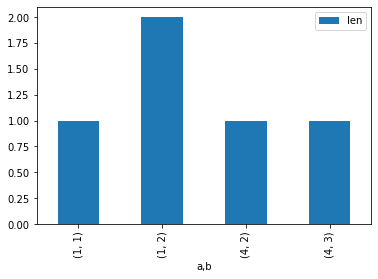

In [444]:
df4.groupby(['a','b']).c.agg([len]).plot(kind = 'bar')